,Conductivity (mS/cm),Time (sec)
0,11.420,0.0
1,11.250,5.0
2,11.060,10.0
3,10.870,15.0
4,10.720,20.0
5,10.560,25.0
6,10.410,30.0
7,10.260,35.0
8,10.120,40.0
9,9.990,45.0


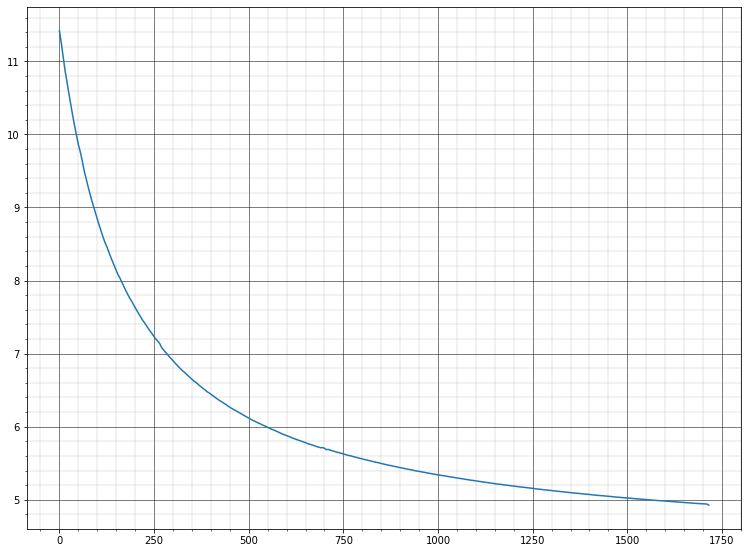

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Conductivity/24_5Cdata3.csv")
data = data[0:len(data["Conductivity (mS/cm)"])-1]
for i in range(len(data["Conductivity (mS/cm)"])):
    data["Conductivity (mS/cm)"][i] = float(data["Conductivity (mS/cm)"][i])

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conductivity (mS/cm)"])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
data

In [23]:
import numpy as np
from scipy.optimize import fsolve
import os

isSteady = False
Linf = 4.44 #Fill in if False

newData = pd.DataFrame()
newData["Time (sec)"] = data["Time (sec)"]

C_Ea0 = 0.05 #mol/L
C_Eainf = 0 #mol/L
L0 = data["Conductivity (mS/cm)"][0]
if isSteady:
    Linf = np.amin(data["Conductivity (mS/cm)"])
newData["Conc Ea (mol/L)"] = np.zeros(len(data["Time (sec)"]))

def FindC_Ea(C_Ea,Lt):
    return ((L0 - Lt)/(Lt - Linf)) - ((C_Ea0 - C_Ea)/(C_Ea - C_Eainf))

reachedMin = False
for i in range(0,len(data["Time (sec)"])):
    if i > 0:
        guessValue = newData["Conc Ea (mol/L)"][i-1]
    else:
        guessValue = C_Ea0
    if data["Conductivity (mS/cm)"][i] != Linf and reachedMin == False:
        newData["Conc Ea (mol/L)"][i] = fsolve(FindC_Ea,guessValue,args=data["Conductivity (mS/cm)"][i])
    else:
        newData["Conc Ea (mol/L)"][i] = C_Eainf
        reachedMin = True
    
# newData["Temperature (degC)"] = np.ones(len(data["Time (sec)"]))*data["Temp degC"][0]

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
ensure_dir("Data Concentration/24_5Cdata3.csv")
newData.to_csv("Data Concentration/24_5Cdata3.csv", index=False, encoding='utf8')

print(Linf)
newData

4.44


,Time (sec),Conc Ea (mol/L)
0,0.0,0.050000
1,5.0,0.048782
2,10.0,0.047421
3,15.0,0.046060
4,20.0,0.044986
5,25.0,0.043840
6,30.0,0.042765
7,35.0,0.041691
8,40.0,0.040688
9,45.0,0.039756
